In [1]:
import sys
import os
os.chdir("..")
os.chdir("./src")
# sys.path.append("./src")

In [2]:
from IPython import display
from IPython.display import clear_output
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
from numba import njit, jit
from time import time
# from helpers import *
from LDMIBSS import *
%load_ext autoreload
%autoreload 2

The following is the correlation matrix of sources


<IPython.core.display.Math object>

The following is the mixture matrix A


<IPython.core.display.Math object>

Input SNR is : 22.23065639844712


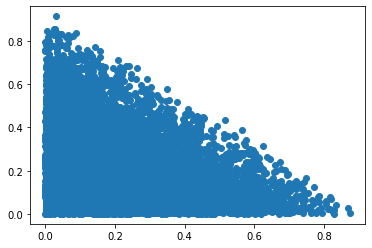

In [3]:
N = 10000
NumberofSources = 5
NumberofMixtures = 10

S = np.random.exponential(scale=1.0, size=(NumberofSources,int(N)))
# S = L @ S
S = S / np.sum(S, axis = 0)
print("The following is the correlation matrix of sources")
display_matrix(np.corrcoef(S))
plt.scatter(S[0,:], S[1,:])

# Generate Mxr random mixing from i.i.d N(0,1)
A = np.random.randn(NumberofMixtures,NumberofSources)
X = np.dot(A,S)

SNR = 30 # dB
NoiseAmp = (10 ** (-SNR/20))# * np.sqrt(NumberofSources)
NoisePart = NoiseAmp * np.random.randn(X.shape[0], X.shape[1])
X = X  + NoisePart
SNRinp = 10 * np.log10(np.sum(np.var(X, axis = 1)) / np.sum(np.var(NoisePart, axis = 1)))
print("The following is the mixture matrix A")
display_matrix(A)
print("Input SNR is : {}".format(SNRinp))

In [4]:
s_dim = S.shape[0]
x_dim = X.shape[0]
debug_iteration_point = 200
model = LDMIBSS(s_dim = s_dim, x_dim = x_dim,
                set_ground_truth = True, S = S, A = A)

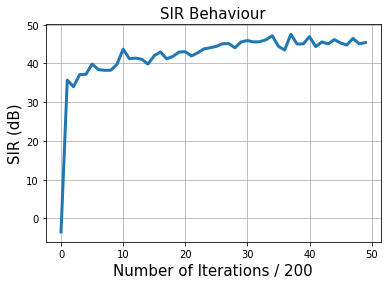

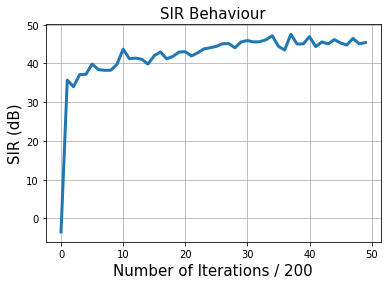

In [5]:
model.fit_batch_simplex(X, epsilon = 1e-5, mu_start = 100, n_iterations = 10000, 
                           method = "covariance", debug_iteration_point = debug_iteration_point,
                           plot_in_jupyter = True)

In [6]:
W = model.W
Y = W @ X
10 * np.log10(CalculateSINR(Y, S)[0])

27.995678117524328

In [7]:
CalculateSIR(A,W)

(45.16736936605259, 5)

In [8]:
Y = W @ X
Y.shape, X.shape, S.shape
Y_ = signed_and_permutation_corrected_sources(S.T,Y.T).T
snr(S.T, Y_.T)

array([28.41217787, 29.41417757, 28.73929454, 25.91643573, 27.91489249])

In [9]:
# def projection_simplex(V, z=1, axis=None):
#     """
#     Projection of x onto the simplex, scaled by z:
#         P(x; z) = argmin_{y >= 0, sum(y) = z} ||y - x||^2
#     z: float or array
#         If array, len(z) must be compatible with V
#     axis: None or int
#         axis=None: project V by P(V.ravel(); z)
#         axis=1: project each V[i] by P(V[i]; z[i])
#         axis=0: project each V[:, j] by P(V[:, j]; z[j])
#     """
#     if axis == 1:
#         n_features = V.shape[1]
#         U = np.sort(V, axis=1)[:, ::-1]
#         z = np.ones(len(V)) * z
#         cssv = np.cumsum(U, axis=1) - z[:, np.newaxis]
#         ind = np.arange(n_features) + 1
#         cond = U - cssv / ind > 0
#         rho = np.count_nonzero(cond, axis=1)
#         theta = cssv[np.arange(len(V)), rho - 1] / rho
#         return np.maximum(V - theta[:, np.newaxis], 0)

#     elif axis == 0:
#         return projection_simplex(V.T, z, axis=1).T

#     else:
#         V = V.ravel().reshape(1, -1)
#         return projection_simplex(V, z, axis=1).ravel()

In [10]:
# %timeit ProjectColstoSimplex(S)

In [11]:
# np.linalg.norm(projection_simplex(S, 1, 0) - ProjectColstoSimplex(S))

In [12]:
# %timeit projection_simplex(S, 1, 0)

In [13]:
# %timeit ProjectRowstoL1NormBall(S.T).T